In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
len(train_labels)

60000

In [10]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

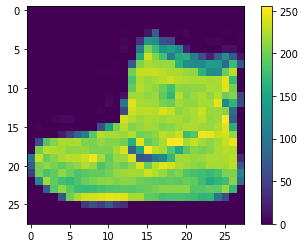

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
train_images = train_images / 255.0
test_images = test_images / 255.0

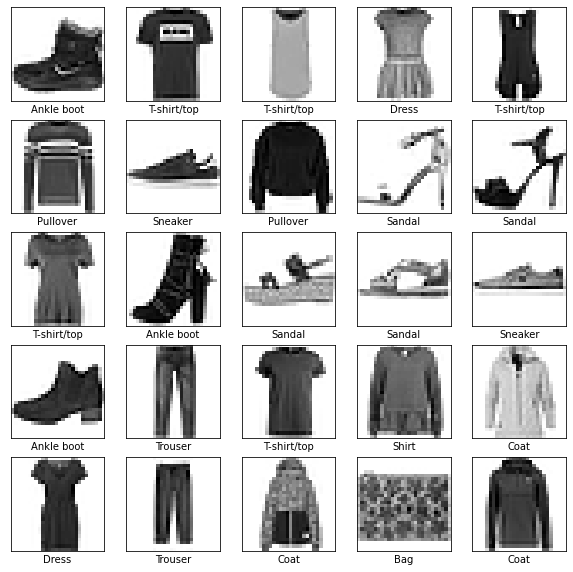

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    #添加Dropout层，抑制过拟合
    keras.layers.Dropout(0.5),
    #增加了两个隐含层，提高网络容量，增加网络拟合能力
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    #keras.layers.Dense(10)
    keras.layers.Dense(10, activation='softmax')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0

In [16]:
#顺序编码需要使用sparse_categorical_crossentropy
model.compile(
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              #optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              #loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
)

In [17]:
history = model.fit(train_images, train_labels, epochs=10,
                   #验证test_images在每次迭代中正确率的情况。
                    validation_data=(test_images, test_labels)
                   )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 231us/sample - loss: 0.8775 - accuracy: 0.6717 - val_loss: 0.5267 - val_accuracy: 0.8096
Epoch 2/10
60000/60000 [==============================] - 11s 177us/sample - loss: 0.6183 - accuracy: 0.7807 - val_loss: 0.4716 - val_accuracy: 0.8370
Epoch 3/10
60000/60000 [==============================] - 10s 171us/sample - loss: 0.5646 - accuracy: 0.8022 - val_loss: 0.4475 - val_accuracy: 0.8376
Epoch 4/10
60000/60000 [==============================] - 11s 184us/sample - loss: 0.5485 - accuracy: 0.8094 - val_loss: 0.4356 - val_accuracy: 0.8501
Epoch 5/10
60000/60000 [==============================] - 11s 187us/sample - loss: 0.5279 - accuracy: 0.8165 - val_loss: 0.4359 - val_accuracy: 0.8443
Epoch 6/10
60000/60000 [==============================] - 11s 178us/sample - loss: 0.5131 - accuracy: 0.8216 - val_loss: 0.4221 - val_accuracy: 0.8455
Epoch 7/10
60000/60000 [====================

In [18]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

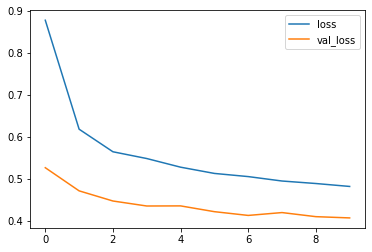

In [19]:
#在test数据里val_loss没有随时间下降反而上升了就称为过拟合。
#过拟合：在训练数据上得分很高，在测试数据上得分相对比较低
#欠拟合：在训练数据上得分低，在测试数据上得分比较低。
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()

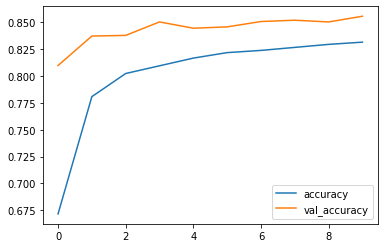

In [23]:
plt.plot(history.epoch, history.history.get('accuracy'), label='accuracy')
plt.plot(history.epoch, history.history.get('val_accuracy'), label='val_accuracy')
plt.legend()

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 0.4073 - accuracy: 0.8554

Test accuracy: 0.8554


In [26]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [27]:
#将train_labels顺序编码转化为train_label_onehot独热编码
train_label_onehot = tf.keras.utils.to_categorical(train_labels)

In [28]:
train_label_onehot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [29]:
test_label_onehot = tf.keras.utils.to_categorical(test_labels)

In [30]:
#独热编码的形式[0, 1, 0]
test_label_onehot

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [31]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    #keras.layers.Dense(10)
    keras.layers.Dense(10, activation='softmax')
])

In [32]:
#独热编码需要使用categorical_crossentropy
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              #loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
)

In [33]:
model.fit(train_images, train_label_onehot, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 102us/sample - loss: 0.5038 - accuracy: 0.8227
Epoch 2/5
60000/60000 [==============================] - 6s 95us/sample - loss: 0.3764 - accuracy: 0.8645
Epoch 3/5
60000/60000 [==============================] - 6s 94us/sample - loss: 0.3385 - accuracy: 0.8759
Epoch 4/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.3135 - accuracy: 0.8849
Epoch 5/5
60000/60000 [==============================] - 6s 94us/sample - loss: 0.2971 - accuracy: 0.8903


In [34]:
predict = model.predict(test_images)

In [35]:
predict.shape

(10000, 10)

In [36]:
test_images.shape

(10000, 28, 28)

In [37]:
predict[0]

array([8.6404916e-06, 7.3203978e-07, 7.9152215e-07, 7.4766122e-09,
       1.4814287e-06, 6.3383891e-03, 6.0644634e-06, 6.1289934e-03,
       9.3382558e-05, 9.8742151e-01], dtype=float32)

In [38]:
np.argmax(predict[0])

9

In [39]:
test_labels[0]

9